### Loan Prediction Problem

#### Problem Statement

Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

#### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_roc_curve
import warnings
from sklearn.preprocessing import StandardScaler, RobustScaler
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

#### Import Data

In [2]:
train_df = pd.read_csv('train_ctrUa4K.csv')

test_df = pd.read_csv('test_lAUu6dG.csv')

sample_df = pd.read_csv('sample_submission_49d68Cx.csv')

In [3]:
train_df['Source'] = 'train'

test_df['Source'] = 'test'

In [4]:
df = pd.concat([train_df, test_df], axis = 0)

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Source
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train


#### EDA

In [6]:
#Getting the brief summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Source             981 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 115.0+ KB


In [7]:
#no. of null values in the dataframe
df.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
Source                 0
dtype: int64

In [8]:
df['Gender'].value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

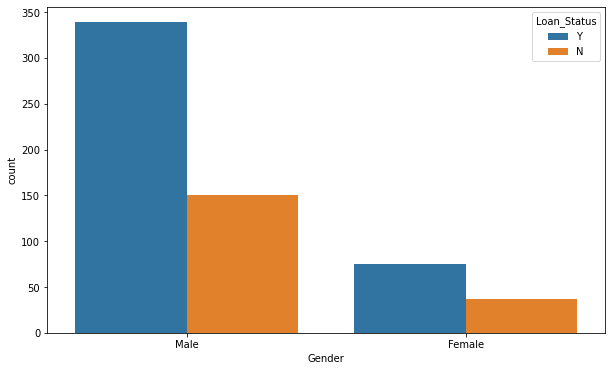

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Gender'], hue=df['Loan_Status']);

**observation** :  
* Looks like male customers are the most who eligible for the Loan

In [10]:
#Loan ID is unique for all customers. It's a Primary Key
df.Loan_ID.nunique()

981

In [11]:
df['Married'].value_counts()

Yes    631
No     347
Name: Married, dtype: int64

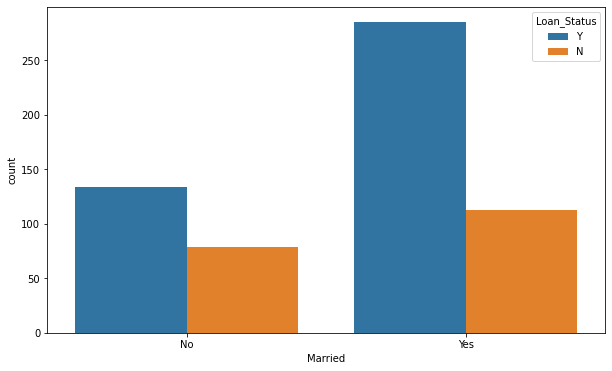

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Married'], hue=df['Loan_Status']);

**Observation** : 
* Married customers have the higher chance to get loan approval

In [13]:
df['Dependents'].value_counts()

0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64

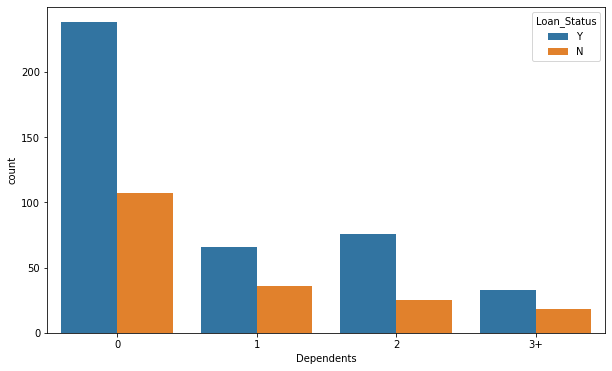

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Dependents'], hue=df['Loan_Status']);

**Observation** : 
* Customers with 0 dependant have the higher chance of getting loan approval. 
* Customers with more than 3 dependents have the lower chance of getting loan approval 

In [15]:
df['Education'].value_counts()

Graduate        763
Not Graduate    218
Name: Education, dtype: int64

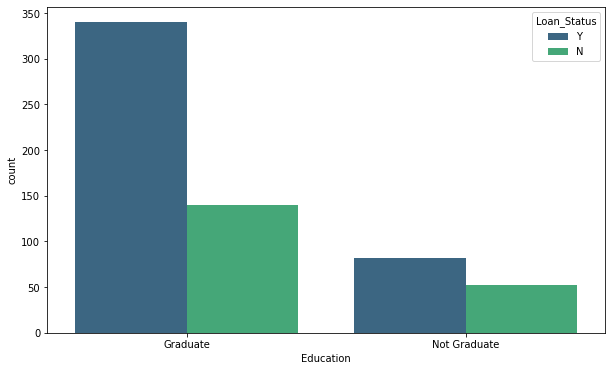

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Education'], hue=df['Loan_Status'], palette='viridis');

**Observation**:
* Graduate People have the higher chance of Loan approval

In [17]:
df['Self_Employed'].value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

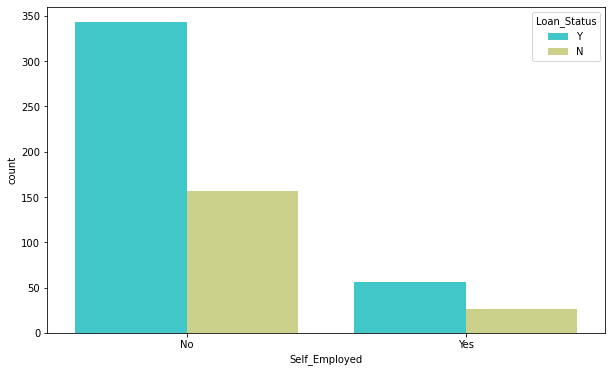

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Self_Employed'], hue=df['Loan_Status'], palette='rainbow');

**Observations**:
* Most of the people falls in Not Self Employed Category.
* Working people have the higher chance of Loan approval compared to Self employed.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

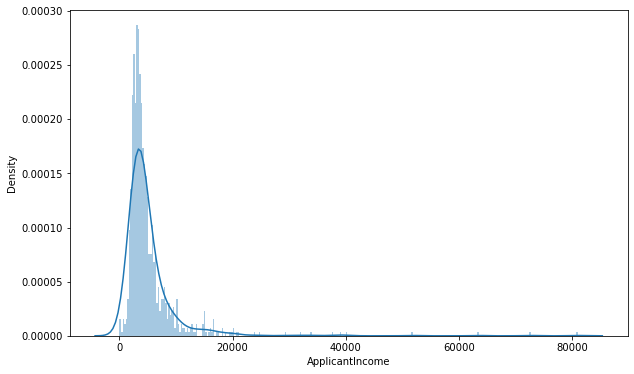

In [19]:
plt.figure(figsize=(10,6))
sns.distplot(df['ApplicantIncome'], bins = 300,)
#Applicant income follows the normal distribution

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

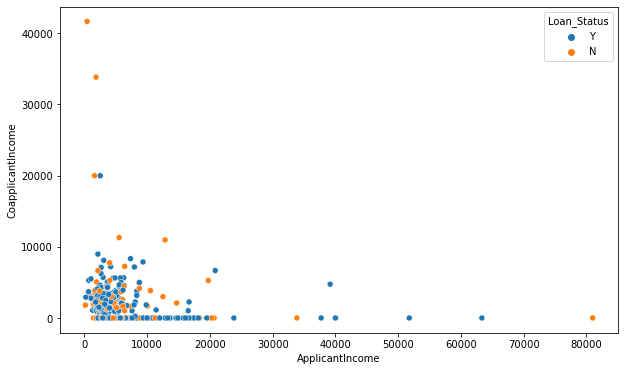

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = df['ApplicantIncome'], y = df['CoapplicantIncome'], hue=df['Loan_Status'])

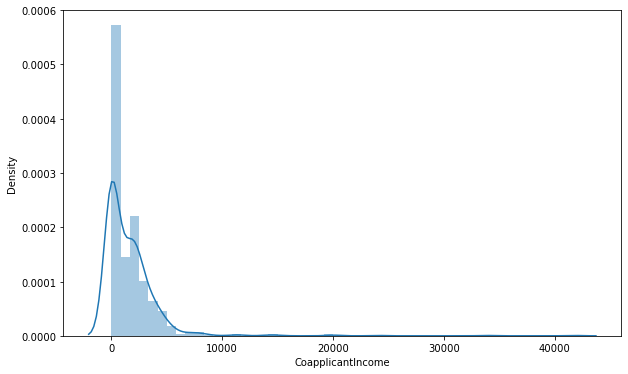

In [21]:
plt.figure(figsize=(10,6))
sns.distplot(df['CoapplicantIncome']);

**Observations**:
* Most of the applicant's co-applicant income have zero value
* More or less it's like left skewed distribution

In [22]:
df['CoapplicantIncome'].value_counts()

0.0       429
2500.0      6
2333.0      5
2083.0      5
2000.0      5
         ... 
3447.0      1
5105.0      1
7873.0      1
923.0       1
1700.0      1
Name: CoapplicantIncome, Length: 437, dtype: int64

In [23]:
df['LoanAmount'].value_counts()

120.0    29
110.0    27
100.0    24
187.0    21
150.0    19
         ..
312.0     1
17.0      1
304.0     1
405.0     1
436.0     1
Name: LoanAmount, Length: 232, dtype: int64

<AxesSubplot:ylabel='Density'>

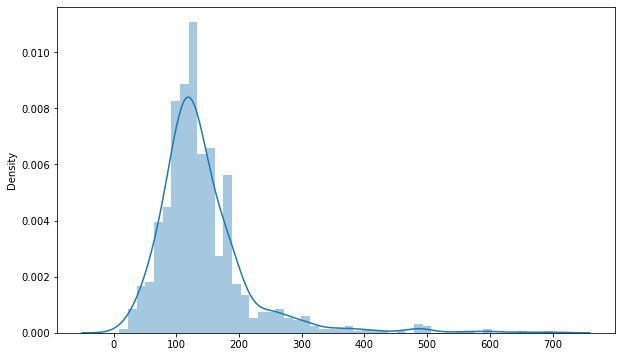

In [24]:
plt.figure(figsize=(10,6))
sns.distplot(x = df['LoanAmount'])
#Loan Amount is normally distributed

In [25]:
df['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

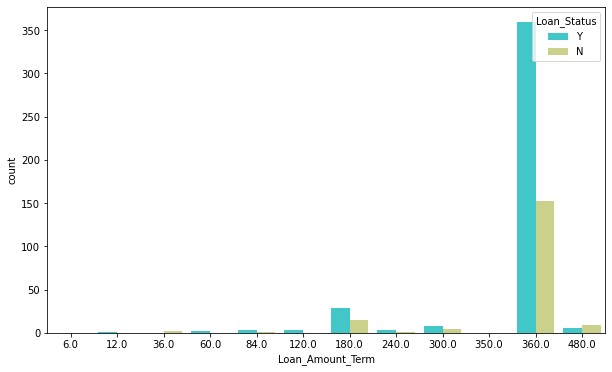

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Loan_Amount_Term'], hue=df['Loan_Status'], palette='rainbow');

**Observations**:
* Most of the Loan amount term is 360.0

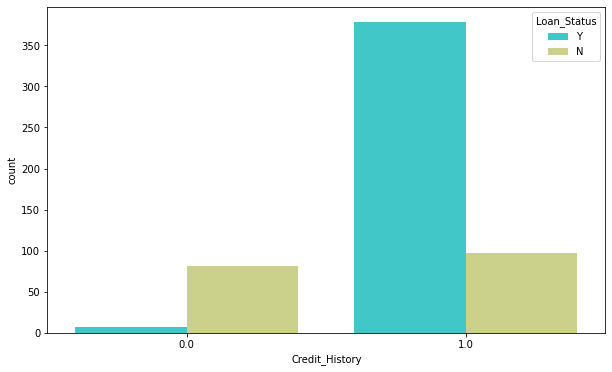

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Credit_History'], hue=df['Loan_Status'], palette='rainbow');

**Observations**
* Most of the applicant's meet the credit guidelines and it has higher chance to get loan approval

In [28]:
df['Property_Area'].value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

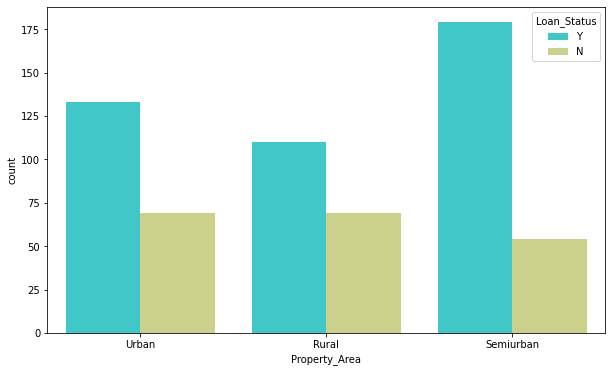

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Property_Area'], hue=df['Loan_Status'], palette='rainbow');

**Observation:**
* Semi-Urban people have higher chance of getting loan approval compared to Urban and Rural people

### Feature Engineering

In [30]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Source
count,981,957,978,956,981,926,981.000000,981.000000,954.000000,961.000000,902.000000,981,614,981
unique,981,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2,2
top,LP002888,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y,train
freq,1,775,631,545,763,807,NaN,NaN,NaN,NaN,NaN,349,422,614
mean,NaN,NaN,NaN,NaN,NaN,NaN,5179.795107,1601.916330,142.511530,342.201873,0.835920,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,5695.104533,2718.772806,77.421743,65.100602,0.370553,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,9.000000,6.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2875.000000,0.000000,100.000000,360.000000,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3800.000000,1110.000000,126.000000,360.000000,1.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5516.000000,2365.000000,162.000000,360.000000,1.000000,NaN,NaN,NaN


In [31]:
def impute_mode(col):
    df[col].fillna(df[col].mode()[0], inplace = True)

In [32]:
def impute_median(col):
    df[col].fillna(df[col].median(), inplace = True)

In [33]:
impute_mode('Gender')

In [34]:
impute_mode('Married')

In [35]:
impute_mode('Dependents')

In [36]:
impute_mode('Self_Employed')

In [37]:
impute_median('LoanAmount')

In [38]:
impute_mode('Loan_Amount_Term')

In [39]:
impute_mode('Credit_History')

In [40]:
df.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
Source                 0
dtype: int64

#### Splliting

In [41]:
gender = pd.get_dummies(df['Gender'], drop_first=False, prefix='Gen')

married = pd.get_dummies(df['Married'], drop_first=False, prefix='Mar')

edu = pd.get_dummies(df['Education'], drop_first=False, prefix = 'Edu')

emp = pd.get_dummies(df['Self_Employed'], drop_first=False, prefix = 'Emp')

cre = pd.get_dummies(df['Credit_History'], drop_first=False, prefix = 'Cre')

loan = pd.get_dummies(df['Loan_Amount_Term'], drop_first=False, prefix = 'Loan')

area = pd.get_dummies(df['Property_Area'], drop_first=False, prefix = 'Area')

In [42]:
final_df = df.drop(['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term', 'Property_Area'], axis = 1)

In [43]:
final_df['Dependents'].replace('3+','3', inplace=True)

In [44]:
final_df['Dependents'].value_counts()

0    570
2    160
1    160
3     91
Name: Dependents, dtype: int64

In [45]:
final_df = pd.concat([final_df,gender, married, edu, emp, cre, loan, area], axis = 1)

In [46]:
final_df.drop('Loan_ID',axis = 1, inplace =True)

### Scaling

In [50]:
ro = RobustScaler()

In [51]:
scaled = pd.DataFrame(ro.fit_transform(final_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]), index=final_df.index, columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])

In [52]:
#Concatenating final df and scaled features

final_df = pd.concat([final_df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Dependents'],axis = 1),scaled], axis = 1)

In [53]:
train_split = final_df[final_df['Source']=='train']

test_split = final_df[final_df['Source'] == 'test']

In [54]:
X_train = train_split.drop(['Loan_Status', 'Source'], axis = 1)

y_train = train_split['Loan_Status']

X_test = test_split.drop(['Loan_Status', 'Source'], axis = 1)

y_test = test_split['Loan_Status']

### Modelling

#### Logistics Regression

In [55]:
lg = LogisticRegression()

lg.fit(X_train, y_train)

LogisticRegression()

In [56]:
train_pred = lg.predict(X_train)

test_pred = lg.predict(X_test)

In [57]:
confusion_matrix(y_train, train_pred)

array([[ 85, 107],
       [  9, 413]])

In [58]:
accuracy_score(y_train, train_pred)

0.8110749185667753

In [59]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           N       0.90      0.44      0.59       192
           Y       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.85      0.71      0.74       614
weighted avg       0.83      0.81      0.79       614



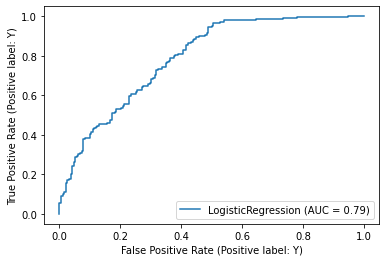

In [413]:
plot_roc_curve(lg,X_train, y_train)

#### K Nearest Neighbours

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn = KNeighborsClassifier(n_neighbors=30,n_jobs=-1)

In [62]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=30)

In [63]:
train_pred_knn = knn.predict(X_train)

In [64]:
confusion_matrix(y_train, train_pred_knn)

array([[ 54, 138],
       [  5, 417]])

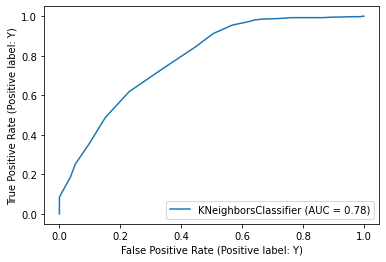

In [65]:
plot_roc_curve(knn, X_train, y_train);

In [66]:
test_pred_knn = knn.predict(X_test)

In [67]:
sample_df['Loan_Status'] = test_pred_knn

sample_df.to_csv('KNN model_30.csv', index = False)

In [68]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_train)
    error_rate.append(np.mean(pred_i != y_train))

Text(0, 0.5, 'Error Rate')

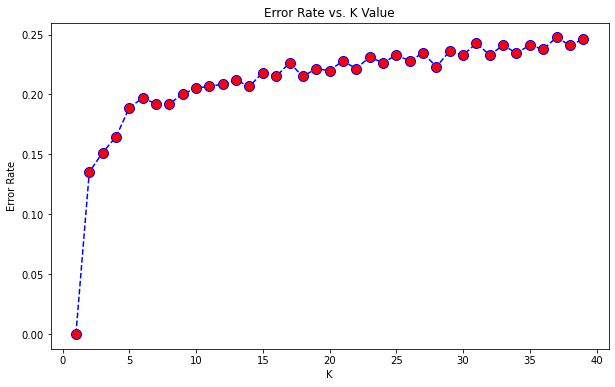

In [69]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### Naive Bayes 

In [70]:
from sklearn.naive_bayes import GaussianNB

In [71]:
gb = GaussianNB()

In [72]:
gb.fit(X_train, y_train)

GaussianNB()

In [73]:
train_pred_gb = gb.predict(X_train)

test_pred_gb = gb.predict(X_test)

In [74]:
confusion_matrix(y_train, train_pred_gb)

array([[190,   2],
       [410,  12]])

In [75]:
print(classification_report(y_train, train_pred_gb))

              precision    recall  f1-score   support

           N       0.32      0.99      0.48       192
           Y       0.86      0.03      0.06       422

    accuracy                           0.33       614
   macro avg       0.59      0.51      0.27       614
weighted avg       0.69      0.33      0.19       614



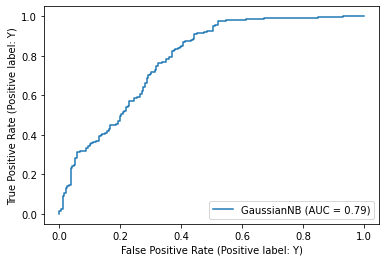

In [76]:
plot_roc_curve(gb, X_train, y_train)

In [77]:
sample_df['Loan_Status'] = test_pred_gb

sample_df.to_csv('NB_ model.csv', index = False)